<h1 style="color:rgb(0,120,170)">Assignment 8: Convolutional Neural Networks </h1>

<h2 style="color:rgb(0,120,170)">Copyright and Fair Use</h2>

This material, no matter whether in printed or electronic form,
may be used for personal and non-commercial educational use
only. Any reproduction of this material, no matter whether as a
whole or in parts, no matter whether in printed or in electronic
form, requires explicit prior acceptance of the authors.

<h2 style="color:rgb(0,120,170)">Automatic Testing Guidelines</h2>

Automatic unittesting requires you to submit a notebook which contains strictly defined objects.
Strictness of definition consists of unified shapes, dtypes, variable names and more.

Within the notebook, we provide detailed instruction which you should follow in order to maximise your final grade.

**Name your notebook properly**, follow the pattern in the template name:

**Assignment_N_NameSurname_matrnumber**
<ol>
    <li>N - number of assignment</li>
    <li>NameSurname - your full name where every part of the name starts with a capital letter, no spaces</li>
    <li>matrnumber - you student number on ID card (with k, potentially with a leading zero)</li>
</ol>

Don't add any cells but use the ones provided by us. All cells have a unique ID so that the unit test can find it, so please do not add or remove any cell!

Always make sure that implemented functions have the correct output and given variables contain the correct data type. In the descriptions for every function you can find information on what datatype an output should have and you should stick to that in order to minimize conflicts with the unittest. Don't import any other packages than listed in the cell with the "imports" tag.

Questions are usually multiple choice (except the task description says otherwise) and can be answered by changing the given variables to either "True" or "False". "None" is counted as a wrong answer in any case!

**Note:** Never use variables you defined in another cell in your functions directly; always pass them to the function as a parameter. In the unitest, they won't be available either. If you want to make sure that everything is executable for the unittest, try executing cells/functions individually (instead of running the whole notebook).

<h2 style="color:rgb(0,120,170)">Task 1: Explicit Computation of CNNs</h2>

In this task, you should do some computuations for CNNs explicitly to gain further understanding how the corresponding operations work. 

<b>Your are not allowed to use any other modules than numpy for all the problems in Task 1.</b>

Assume you are given an input image, for example $\mathbf{x}=\begin{pmatrix} 1 & 0 & 1 & 1 & 0 & 0 \\ 0 & 1 & 1 & 0 & 0 & 0 \\ 0 & 1 & 0 & 1 & 1 & 0 \\ 1 & 1 & 0 & 1 & 1 & 1 \\ 0 & 1 & 1 & 1 & 0 & 0 \\ 1 & 1 & 1 & 0 & 0 & 1  \end{pmatrix}$, and a kernel $\mathbf{W}=\begin{pmatrix} 1 & 1 & 1 \\ 0 & 2 & 0 \\ 1 & 1 & 1 \end{pmatrix}$ and compute $\mathbf{s}=\mathbf{W} * \mathbf{x}$.
* **Code 1.1**:
    * To do this, implement the function `compute_convolution` which computes the result of $\mathbf{W} * \mathbf{x}$ without any padding. While you are allowed to use numpy, `np.convolve` is obviously not allowed for this exercise (you might want to still look up its documentation).
    * Also, consider the functionality of using the stride parameter in the function.
      
After convolution layers, you usually find pooling layers in CNNs to reduce the input size for further layers. To this end, we ask you to implement your own pooling function as well.
* **Code 1.2**:
    * Implement the function `pooling` which applies one of the following 3 pooling methods, given as the input string parameter `pooling_type`:
        1. `"max-pooling"` applies max-pooling - using the maximum of all values in the pooling window.
        2. `"mean-pooling"` applies mean-pooling - using the mean of all values in the pooling window.
        3. `"n-max-pooling"` applies n-max-pooling for a given optional parameter `n_max: int` - using the mean of the "n" maximum values in the
        pooling window (defaults to `n_max=1`, i.e. max-pooling). Refer to the lecture material for more elaborate definitions.
        4. Raise a `ValueError` if `pooling_type` is not one of those 3 or `n_max` is larger than the maximum of values in the pooling window in n-max pooling.
        5. Again, while numpy is allowed, the respective functions like `np.MaxPool2D` and so on are not allowed (still, it might be useful to look at their documentation)!
    * **Hint:** You can probably reuse big parts of the previous task for this. Assume that `stride=pooling_size` for the pooling operation e.g. pooling with non-overlapping windows (like shown in the lecture slides of Unit 7 p.15).
 
Right now, our implementation for the convolution will decrease the image size in any case, but often one wants to end up with a specific dimension in the end. Therefore we need to manipulate the given image in order to be able to apply the convolution in a way that delivers the desired output.

* **Code 1.3**:
    * Implement the function `compute_padding_size` which calculates the needed padding size given the original size, kernel size and a stride parameter to end up with some desired size of the feature map in the end. You can assume that height = width for all entities. Keep in mind that only a non-negative integer solution will make sense in this case, so if the result is not an integer or smaller than 0 raise a `ValueError`.
* **Code 1.4**:
    * Implement the function `padding` which applies one of the two following padding-operations: 
        1. Zero-padding: `pad_type="zero"` - Image is padded with `pad_size` number of zeros on all four sides.
        Example: $\begin{pmatrix} 0 & 1 & 1 \\ 0 & 2 & 0 \\ 1 & 1 & 1 \end{pmatrix} \rightarrow$ pad-size = 1, pad_type = "zero": $\begin{pmatrix} 0 & 0 & 0 & 0 & 0 \\ 0 & 0 & 1 & 1 & 0 \\ 0 & 0 & 2 & 0 & 0\\ 0& 1 & 1 & 1 & 0 \\ 0& 0 & 0 & 0 & 0\end{pmatrix}$
    
        2. Repeat-padding: `pad_type="repeat"` - Also "Replication-" or "Reflection-padding", Values at the borders of the image are used to pad the image. Use only the outer-most values, in the corners repeat the value in the corner 3 times for each padding layer.     Example: $\begin{pmatrix} 0 & 1 & 1 \\ 0 & 2 & 0 \\ 1 & 1 & \color{red}1 \end{pmatrix} \rightarrow$ pad-size = 1, pad_type = "repeat": $\begin{pmatrix} 0 & 0 & 1 & 1 & 1 \\ 0 & 0 & 1 & 1 & 1 \\ 0 & 0 & 2 & 0 & 0\\ 1& 1 & 1 & \color{pink}1 & \color{red}1 \\ 1& 1 & 1 & \color{red}1 & \color{red}1\end{pmatrix}$
     
    * Again, do not use the function `np.pad` (but maybe look it up).
Now everything should be in place and we can combine the implemented solution into one pipeline.

* **Code 1.5**:
    * Implement the function `process_image(...)` which takes an image, output size, filter, a stride parameter and all other necessary inputs for the sub-functions as input and first computes the convolution followed by pooling. 
Keep in mind, that the image might have to be padded before application of the convolution to get the desired output shape.

    * **Note:** You can still assume that both image and kernel are quadratic (i.e. height = width).

<h3 style="color:rgb(208,90,80)">Code 1.1 (20 Points)</h3>

In [43]:
# Nothing to do here, just run the cell.
# Only numpy is allowed in Task 1!
import numpy as np

In [44]:
def compute_convolution(image: np.ndarray, kernel: np.ndarray, stride: int) -> np.ndarray:
    """Function that computes the convolution of an image array with a given filter.
    
    Parameters
    ----------
    image : (H, W) np.ndarray
        Input image.
    kernel : (K, K) np.ndarray
        Convolution kernel.
    stride : int
        Stride parameter for the convolution operation.

    Returns
    -------
    convolved : np.ndarray
        Convoluted image.
    """
    # YOUR CODE HERE
    # Get spatial dimensions
    H, W = image.shape
    K, _ = kernel.shape  # kernel is K x K

    # Compute the output height/width
    out_h = (H - K) // stride + 1
    out_w = (W - K) // stride + 1
    
    # Initialize output
    convolved = np.zeros((out_h, out_w), dtype=image.dtype)
    
    # Convolution (no padding)
    for row_out in range(out_h):
        for col_out in range(out_w):
            # Compute the top-left corner of the current "slice"
            row_start = row_out * stride
            col_start = col_out * stride
            
            # Extract the region of the image that we convolve with the kernel
            img_slice = image[row_start:row_start + K, col_start:col_start + K]
            
            # Elementwise multiply and sum
            convolved[row_out, col_out] = np.sum(img_slice * kernel)
    
    return convolved

In [45]:
# DO NOT DELETE OR EDIT THIS CELL!
image = np.array([[1,0,1,1,0,0],[0,1,1,0,0,0],[0,1,0,1,1,0],[1,1,0,1,1,1],[0,1,1,1,0,0],[1,1,1,0,0,1]])
kernel = np.array([[1,1,1],[0,2,0],[1,1,1]])
print(f"Image:\n{image}\n")
print(f"Kernel:\n{kernel}\n")

stride_1 = compute_convolution(image, kernel, 1)
assert isinstance(stride_1, np.ndarray), "Convolved image is not a np.ndarray!"
assert stride_1.shape == (4, 4), "Expected shape for stride = 1: 4x4"
np.testing.assert_array_equal(stride_1, np.array([[5, 6, 4, 3], [6, 4, 5, 5], [5, 5, 6, 5], [7, 6, 5 ,4]]))
print(f"Convolved image with stride 1:\n{stride_1}")

Image:
[[1 0 1 1 0 0]
 [0 1 1 0 0 0]
 [0 1 0 1 1 0]
 [1 1 0 1 1 1]
 [0 1 1 1 0 0]
 [1 1 1 0 0 1]]

Kernel:
[[1 1 1]
 [0 2 0]
 [1 1 1]]

Convolved image with stride 1:
[[5 6 4 3]
 [6 4 5 5]
 [5 5 6 5]
 [7 6 5 4]]


In [46]:
# DO NOT DELETE OR EDIT THIS CELL!
stride_3 = compute_convolution(image, kernel, 3)

assert stride_3.shape == (2, 2), "Expected shape for stride = 3: 2x2"
np.testing.assert_array_equal(stride_3, np.array([[5, 3], [7, 4]]))
print(f"Convolved image with stride 3:\n{stride_3}")

Convolved image with stride 3:
[[5 3]
 [7 4]]


<h3 style="color:rgb(208,90,80)">Code 1.2 (20 Points)</h3>

In [47]:
def pooling(image: np.ndarray, pooling_size: int, pooling_type: str, n_max: int = 1) -> np.ndarray:
    """Function that applies desired pooling-type on an image.

    Hint: Assume stride = pooling_size, so no overlapping pooling windows.
    
    Parameters
    ----------
    image : (H, W) np.ndarray
        Input image.
    pooling_size : int
        Size of pooling window (pooling_size X pooling_size).
    pooling_type : str
        Type of pooling that should be applied, choose from "max-pooling", "mean-pooling", "n-max-pooling".
    n_max : int, optional
        Parameter for n-max-pooling, by default 1.

    Returns
    -------
    pooled : np.ndarray
        Pooled image array

    Raises
    ------
    ValueError
        If the desired pooling type does not exist of if pooling_type="n_max" and n_max is larger than there are elements in the pooling window.
    """
    # YOUR CODE HERE
    H, W = image.shape
    # The stride is the same as pooling_size for non-overlapping windows
    stride = pooling_size
    
    # Compute output size
    out_h = H // pooling_size
    out_w = W // pooling_size
    
    # Initialize output
    pooled = np.zeros((out_h, out_w), dtype=float)
    
    # Number of elements in one pooling window
    window_elems = pooling_size * pooling_size
    
    for row_out in range(out_h):
        for col_out in range(out_w):
            # Find the region in the original image
            row_start = row_out * stride
            col_start = col_out * stride
            
            window = image[row_start:row_start + pooling_size,
                           col_start:col_start + pooling_size]
            
            if pooling_type == "max-pooling":
                pooled[row_out, col_out] = np.max(window)
            
            elif pooling_type == "mean-pooling":
                pooled[row_out, col_out] = np.mean(window)
            
            elif pooling_type == "n-max-pooling":
                # Check that n_max is not larger than number of values in the window
                if n_max > window_elems:
                    raise ValueError(f"`n_max` = {n_max} is larger than total elements "
                                     f"in window ({window_elems}).")
                # Flatten the window, get the n_max largest values and average them
                flat_window = window.flatten()
                # Partition the array so that the largest n_max elements are at the end
                # Then we slice those n_max largest elements and take the mean
                indices = np.argpartition(flat_window, -n_max)[-n_max:]
                pooled[row_out, col_out] = np.mean(flat_window[indices])
            
            else:
                raise ValueError(f"Invalid pooling_type '{pooling_type}'!")
    
    return pooled

In [48]:
# DO NOT DELETE OR EDIT THIS CELL!
image = np.array([[5, 6, 4, 3], [6, 4, 5, 5], [5, 5, 6, 5], [7, 6, 5 ,4]])

try:
    pooling(image, 2, "poolbilliard")
except ValueError:
    pass
else:
    raise AssertionError("ValueError not raised for invalid pooling_type!")

In [49]:
# DO NOT DELETE OR EDIT THIS CELL!
try:
    pooling(image, 2, "n-max-pooling", 20)
except ValueError:
    pass
else:
    raise AssertionError("ValueError not raised when n_max is too large!")

In [50]:
# DO NOT DELETE OR EDIT THIS CELL!
max_pooled = pooling(image, 2, "max-pooling")

assert isinstance(max_pooled, np.ndarray), "The pooled image is not a np.ndarray!"
np.testing.assert_array_equal(max_pooled, np.array([[6, 5], [7, 6]]))
print(f"Image:\n{image}\n")
print(f"Max-pooled:\n{max_pooled}")

Image:
[[5 6 4 3]
 [6 4 5 5]
 [5 5 6 5]
 [7 6 5 4]]

Max-pooled:
[[6. 5.]
 [7. 6.]]


In [51]:
# DO NOT DELETE OR EDIT THIS CELL!
mean_pooled = pooling(image, 2, "mean-pooling")

np.testing.assert_array_almost_equal(mean_pooled, np.array([[5.25, 4.25], [5.75, 5.]]), 2)
print(f"Image:\n{image}\n")
print(f"Mean-pooled:\n{mean_pooled}")

Image:
[[5 6 4 3]
 [6 4 5 5]
 [5 5 6 5]
 [7 6 5 4]]

Mean-pooled:
[[5.25 4.25]
 [5.75 5.  ]]


In [52]:
# DO NOT DELETE OR EDIT THIS CELL!
n_max_pooled = pooling(stride_1, 2, "n-max-pooling", 3)

np.testing.assert_array_almost_equal(n_max_pooled, np.array([[5.67, 4.67], [6, 5.33]]), 2)
print(f"Image:\n{image}\n")
print(f"3-Max-pooled:\n{n_max_pooled}")

Image:
[[5 6 4 3]
 [6 4 5 5]
 [5 5 6 5]
 [7 6 5 4]]

3-Max-pooled:
[[5.66666667 4.66666667]
 [6.         5.33333333]]


<h3 style="color:rgb(208,90,80)">Code 1.3 (10 Points)</h3>

In [53]:
def compute_padding(input_size: int, output_size: int, kernel_size: int, stride: int) -> int: 
    """Function that computes necessary padding to receive desired image shape after convolution.
    
    Remember that padding is usually done before the convolution, for simplicity ignore possible pooling afterwards.
    It is possible that invalid input parameters lead to "half-integer" results, or negative values.
    For such outcomes, the function should raise a ValueError.
    
    Parameters
    ----------
    input_size : int
        Size of input image.
    output_size : int
        Desired size of final output.
    kernel_size : int
        Filter size of convolution.
    stride : int
        Stride of convolution.

    Returns
    -------
    padding: int
        The required padding size as integer is returned if input parameters are valid (can be 0)

    Raises
    ------
    ValueError
        If the computed padding size is not an integer or negative.
    """
    # YOUR CODE HERE
    
    # From the standard CNN formula:
    # output_size = (input_size - kernel_size + 2*padding) // stride + 1
    # Rearrange to solve for padding:
    # output_size - 1 = (input_size - kernel_size + 2*padding) // stride
    # => (output_size - 1) * stride = input_size - kernel_size + 2*padding
    # => 2*padding = (output_size - 1)*stride - input_size + kernel_size
    # => padding = [((output_size - 1)*stride) - input_size + kernel_size] / 2
    
    numerator = (output_size - 1) * stride - input_size + kernel_size
    if numerator < 0:
        # If numerator is negative, definitely can't have a non-negative padding
        raise ValueError("Computed negative padding.")
    
    # must be integer
    if numerator % 2 != 0:
        raise ValueError("Computed padding is not an integer.")
    
    padding = numerator // 2
    
    if padding < 0:
        raise ValueError("Padding cannot be negative.")
    
    return padding

In [54]:
# DO NOT DELETE OR EDIT THIS CELL!
try:
    compute_padding(4, 4, 3, 2)
except ValueError:
    pass
else:
    raise AssertionError("ValueError is not raised!")

In [55]:
# DO NOT DELETE OR EDIT THIS CELL!
padding_size = compute_padding(4, 6, 2, 2)

assert isinstance(padding_size, int), "The computed padding size is not an integer!"
assert padding_size == 4, "Wrong padding size!"

<h3 style="color:rgb(208,90,80)">Code 1.4 (20 Points)</h3>

In [56]:
def padding(image: np.ndarray, pad_size: int, pad_type: str) -> np.ndarray:
    """Function that pads an Image with either zero-padding or repeat-padding.
    Parameters
    ----------
    image : (H, H) np.ndarray
        Input image.
    pad_size : int
        How much padding should be applied on either side of the image, should also work with pad_size = 0.
    pad_type : str
        Type of padding: "zero" or "repeat" 

    Returns
    -------
    padded : np.ndarray
        Padded image.

    Raises
    ------
    ValueError
        Raises ValueError for inputs other than "zero" or "repeat" for pad_type or if pad_size is smaller than 0.
    """
    # YOUR CODE HERE
    if pad_size < 0:
        raise ValueError("pad_size cannot be negative.")
    if pad_type not in ["zero", "repeat"]:
        raise ValueError(f"Invalid pad_type '{pad_type}'.")

    if pad_size == 0:
        # No padding, return the original image
        return image

    H, W = image.shape
    new_H = H + 2 * pad_size
    new_W = W + 2 * pad_size
    
    padded = np.zeros((new_H, new_W), dtype=image.dtype)
    
    if pad_type == "zero":
        # Just fill the middle with the original image
        padded[pad_size:pad_size + H, pad_size:pad_size + W] = image
    
    elif pad_type == "repeat":
        # Step 1: place the original image in the center
        padded[pad_size:pad_size + H, pad_size:pad_size + W] = image
        
        # Step 2: fill top rows and bottom rows by repeating
        # Top rows
        for r in range(pad_size):
            padded[r, pad_size:pad_size + W] = image[0, :]
        # Bottom rows
        for r in range(pad_size):
            padded[new_H - 1 - r, pad_size:pad_size + W] = image[-1, :]
        
        # Step 3: fill left columns and right columns by repeating
        for c in range(pad_size):
            padded[:, c] = padded[:, pad_size]  # left side
            padded[:, new_W - 1 - c] = padded[:, new_W - 1 - pad_size]
        
        # Step 4: corners effectively get repeated as well
        # but the above loops already replicate corner pixels.
        # If you want to do it explicitly, you could, but the above covers it.
    
    return padded

In [57]:
# DO NOT DELETE OR EDIT THIS CELL!
image_test = np.array([[0,0,1,1],[0,1,1,0],[0,1,0,1],[1,1,0,1]])

try:
    padding(image_test, -1, "zero")
    padding(image_test, 2, "from_zero_to_hero")
except ValueError:
    pass
else:
    raise AssertionError("ValueError is not raised!")

In [58]:
# DO NOT DELETE OR EDIT THIS CELL!
padded_zero = padding(image_test, 3, "zero")
padded_repeat = padding(image_test, 3, "repeat")
padded_correct_zero = np.array([
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0,],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0,],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0,],
    [0, 0, 0, 0, 0, 1, 1, 0, 0, 0,],
    [0, 0, 0, 0, 1, 1, 0, 0, 0, 0,],
    [0, 0, 0, 0, 1, 0, 1, 0, 0, 0,],
    [0, 0, 0, 1, 1, 0, 1, 0, 0, 0,],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0,],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0,],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0,]
])
padded_correct_repeat = np.array([
    [0, 0, 0, 0, 0, 1, 1, 1, 1, 1],
    [0, 0, 0, 0, 0, 1, 1, 1, 1, 1],
    [0, 0, 0, 0, 0, 1, 1, 1, 1, 1],
    [0, 0, 0, 0, 0, 1, 1, 1, 1, 1],
    [0, 0, 0, 0, 1, 1, 0, 0, 0, 0],
    [0, 0, 0, 0, 1, 0, 1, 1, 1, 1],
    [1, 1, 1, 1, 1, 0, 1, 1, 1, 1],
    [1, 1, 1, 1, 1, 0, 1, 1, 1, 1],
    [1, 1, 1, 1, 1, 0, 1, 1, 1, 1],
    [1, 1, 1, 1, 1, 0, 1, 1, 1, 1]
])

assert isinstance(padded_zero, np.ndarray), "The resulting padded image is not a np.ndarray!"
np.testing.assert_array_equal(padded_correct_zero, padded_zero)
print(f"Image:\n{image_test}\n")
print(f"Image after zero-padding with padding size 3:\n{padded_zero}\n")
np.testing.assert_array_equal(padded_correct_repeat, padded_repeat)
print(f"Image after repeat-padding with padding size 3:\n{padded_repeat}")

Image:
[[0 0 1 1]
 [0 1 1 0]
 [0 1 0 1]
 [1 1 0 1]]

Image after zero-padding with padding size 3:
[[0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 1 1 0 0 0]
 [0 0 0 0 1 1 0 0 0 0]
 [0 0 0 0 1 0 1 0 0 0]
 [0 0 0 1 1 0 1 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]]

Image after repeat-padding with padding size 3:
[[0 0 0 0 0 1 1 1 1 1]
 [0 0 0 0 0 1 1 1 1 1]
 [0 0 0 0 0 1 1 1 1 1]
 [0 0 0 0 0 1 1 1 1 1]
 [0 0 0 0 1 1 0 0 0 0]
 [0 0 0 0 1 0 1 1 1 1]
 [1 1 1 1 1 0 1 1 1 1]
 [1 1 1 1 1 0 1 1 1 1]
 [1 1 1 1 1 0 1 1 1 1]
 [1 1 1 1 1 0 1 1 1 1]]


<h3 style="color:rgb(208,90,80)">Code 1.5 (5 Points)</h3>

In [59]:
def process_image(
    image: np.ndarray,
    output_size: int,
    kernel: np.ndarray,
    stride: int,
    pooling_size: int,
    pooling_type: str,
    padding_type: str,
    compute_padding_size_fn: callable,
    padding_fn: callable,
    compute_convolution_fn: callable,
    pooling_fn: callable,
    n_max: int = 1
) -> np.ndarray:
    """Function that processes an image array. It first calculates the necessary padding, if padding is possible it performs the padding, followed by convolution and pooling.
    
    Your previously implemented functions will be fed to this function.
    Make sure to only use the functions and their respective names provided inside this function!

    Parameters
    ----------
    image : (H, H) np.ndarray
        Input image.
    output_size : int
        Desired shape after convolution.
    kernel : np.ndarray
        Kernel applied during convolution.
    stride : int
        stride parameter of convolution
    pooling_size : int
        Pooling size.
    pooling_type : str
        Type of pooling (mean-, max- or n-max-pooling).
    padding_type : str
        Type of padding (zero or repeat).
    compute_padding_size_fn : callable
        the compute padding size function implemented by you, use is to compute the padding size
    padding_fn : callable
        The padding function, use it to pad the input image.
    compute_convolution_fn : callable
        The convolution function, use it to convolve the (padded) input image.
    pooling_fn : callable
        The pooling function, use it to apply pooling on your convolved image.
    n_max: int, optional
        n_max parameter for n-max-pooling if applied, defaults to 1.

    Returns
    -------
    processed_image : np.ndarray
        Returns processed image if inputs are valid and padding is possible (also if padding is just 0!)

    Raises
    ------
    ValueError
        If padding is impossible due to invalid inputs.
    """
    # YOUR CODE HERE
    # 1) Compute how much padding we need
    try:
        pad_size = compute_padding_size_fn(
            input_size=image.shape[0],
            output_size=output_size,
            kernel_size=kernel.shape[0],
            stride=stride
        )
    except ValueError as e:
        raise ValueError(f"Padding is impossible: {e}")
    
    # 2) Pad the image
    padded_image = padding_fn(image, pad_size, padding_type)

    # 3) Convolve
    convolved = compute_convolution_fn(padded_image, kernel, stride)

    # 4) Pool
    pooled = pooling_fn(convolved, pooling_size, pooling_type, n_max)
    
    return pooled

In [60]:
# DO NOT DELETE OR EDIT THIS CELL!
kernel_test = np.array([[1, 1], [0, 2]])
processed_correct = np.array([[0, 4, 4], [2, 3, 4], [4, 4, 4]])
res = process_image(image_test, 6, kernel_test, 2, 2, "max-pooling", "repeat", compute_padding, padding, compute_convolution, pooling)
np.testing.assert_array_almost_equal(res, processed_correct)
try:
    process_image(image_test, 4, kernel_test, 3, 2, "max-pooling", "repeat", compute_padding, padding, compute_convolution, pooling)
except ValueError:
    pass
else:
    raise AssertionError("ValueError is not raised!")
print(f"Image:\n{image_test}\n")
print(f"Kernel:\n{kernel_test}\n")
print(f"Processed image:\n{res}")

Image:
[[0 0 1 1]
 [0 1 1 0]
 [0 1 0 1]
 [1 1 0 1]]

Kernel:
[[1 1]
 [0 2]]

Processed image:
[[0. 4. 4.]
 [2. 3. 4.]
 [4. 4. 4.]]


<h2 style="color:rgb(0,120,170)">Task 2: CNNs vs. the Rest</h2>
In this task, you can carry out a comparison of several classifiers on different portions of the FashionMNIST data set. From the whole training data we create smaller training sets that have $[0.05,0.10,0.25, 0.50, 1.00]$ times the the size of the total set. Compared to the previous assignment, the data loader is modified a little so that it outputs different formats for the computations with PyTorch, where we use tensors, and sklearn, where we use numpy arrays.
We make our comparison based on three metrics:

1. Accuracy: The standard (but not necessarily best) metric for evaluating the performance of a model in predicting the labels of unseen samples (correct predictions divided by number of samples in test set).
2. Training Time: For RandomForest and SVM this is the time measured for fitting the model on the training data, for the CNNs it's the time measured from initialization of the model until the end of the last training epoch (sum over all epochs).
3. Inference Time: Time measured for the model to calculate predictions on the test data, for CNNs it's the mean of the time taken to calculate predictions over all epochs.

**Important:** To save computation time for unit testing, you may simply use the hard-coded experiment results given below. If you decide to try to run the experiments yourself, please change the variable `i_cant_wait` to `True` before submitting your assignment. This saves the tutors quite some time :D
* **Plot 2.1**:
    * As a final task, create the following three plots:
        - Accuracies against fraction of the dataset used for training
        - Inference times against fraction of the dataset used for training
        - Training times against fraction of the dataset used for training
    * Compare the performance of all models in each of these three plots and don't forget to label the plots appropriately!
* **Question 2.2**:
    *  Finally, answer some questions about the results.

In [61]:
# Nothing to do here, just run the cell.
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
import matplotlib.pyplot as plt
import os
import time
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [62]:
# Nothing to do here, just run the cell.
int_classes = int 
seed = 42
torch.manual_seed(seed)
np.random.seed(seed)
use_cuda = torch.cuda.is_available()
use_mps = torch.backends.mps.is_available()
device = torch.device('cuda' if use_cuda else 'mps' if use_mps else 'cpu')

In [63]:
# Nothing to do here, just run the cell.
# Use Pytorch dataloader with a subset of the training data.
def get_sampler(N_samples):  
    mask = list(np.arange(N_samples))  ## list of valid sample_ids
    return torch.utils.data.RandomSampler(mask) ## random order

def get_data_loader(use_cuda, batch_size=64,train=True,get_all=False,sampler=None):
    kwargs = {'num_workers': 1, 'pin_memory': True} if use_cuda else {}
    loader = torch.utils.data.DataLoader(
        datasets.FashionMNIST(os.path.join(os.path.expanduser("~"), '.FashionMNIST')
                            ,train=train, download=True,
                       transform=transforms.Compose([
                           transforms.ToTensor(),
                           transforms.Normalize((0.2859,), (0.3530,))
                       ])), shuffle=False, sampler=sampler, batch_size=batch_size,**kwargs)
    # Return numpy arrays of the dataset.
    if get_all: 
        for _, (train_samples, train_labels) in enumerate(loader):
            return train_samples.numpy().reshape(-1,28*28),train_labels.numpy()
    # Return loader to provide minibatches.
    else:
        return loader

Now we want to apply different models to our prepared data. We also want to print and store accuracy, training time and inference time, so these should be our results. In the dictionary "experiments", we want to store these informations in an array for the different models and different training data sizes. Just run the code in oder to understand better what is meant exactly.

In [64]:
# If you dont want to wait, or dont trust your results, you can use these hard-coded values, just let the variable on True and all the following cells will be skipped.
# Set the variable to False to really try out different models yourself.

### IMPORTANT ###
# Set this variable to True before submitting your notebook.
i_cant_wait = True
### IMPORTANT ###

if i_cant_wait:
    models = ["RF_100", "RF_500","SVM", "CNN_simple", "CNN_wide", "CNN_deep", "CNN_wide_max"]
    experiments ={
        'percentages': np.array([0.05, 0.1 , 0.25, 0.5 , 1.  ]),
        'N_samples': np.array([ 3000,  6000, 15000, 30000, 60000]),
        'RF_100': {'accuracy': np.array([81.95, 83.16, 83.97, 84.2 , 84.22]),
        'training_time': np.array([ 3.88,  7.04, 14.97, 26.81, 48.92]),
        'inference_time': np.array([0.32, 0.35, 0.35, 0.35, 0.36])},
        'RF_500': {'accuracy': np.array([82.02, 83.38, 84.17, 84.33, 84.54]),
        'training_time': np.array([ 19.58,  35.38,  75.22, 136.4 , 248.76]),
        'inference_time': np.array([1.63, 1.69, 1.74, 1.81, 1.82])},
        'SVM': {'accuracy': np.array([81.34, 83.63, 86.07, 87.9 , 89.21]),
        'training_time': np.array([  0.67,   2.05,  25.23,  87.59, 285.24]),
        'inference_time': np.array([ 2.1 ,  7.13, 20.22, 36.  , 63.75])},
        'CNN_simple': {'accuracy': np.array([61.28, 70.95, 75.11, 77.88, 81.79]),
        'training_time': np.array([ 4.75,  9.35, 23.41, 47.32, 94.26]),
        'inference_time': np.array([2.11, 2.08, 2.09, 2.1 , 2.1 ])},
        'CNN_wide': {'accuracy': np.array([74.97, 73.27, 81.03, 80.41, 86.37]),
        'training_time': np.array([  8.74,  17.56,  43.59,  87.59, 176.37]),
        'inference_time': np.array([3.13, 3.13, 3.1 , 3.11, 3.11])},
        'CNN_deep': {'accuracy': np.array([68.77, 77.11, 83.79, 85.49, 90.01]),
        'training_time': np.array([  8.82,  17.75,  43.92,  87.58, 176.93]),
        'inference_time': np.array([2.66, 2.66, 2.68, 2.66, 2.68])},
        'CNN_wide_max': {'accuracy': np.array([83.38, 86.06, 87.44, 89.61, 91.11]),
        'training_time': np.array([  9.16,  18.65,  45.46,  90.35, 182.02]),
        'inference_time': np.array([3.28, 3.26, 3.27, 3.24, 3.18])}
    }
else:
    # Prepare data.
    train_samples, train_labels = get_data_loader(use_cuda,batch_size=6*10**4,train=True,get_all = True)
    test_samples, test_labels = get_data_loader(use_cuda,batch_size=10**4,train=False,get_all = True)
    
    models = ["RF_100", "RF_500","SVM", "CNN_simple", "CNN_wide", "CNN_deep", "CNN_wide_max"]
    results = ["accuracy","training_time","inference_time"]
    experiments = {}
    experiments["percentages"] = np.array([0.05,0.10,0.25,0.50,1.00])
    experiments["N_samples"] = (60000 * experiments["percentages"]).astype(int)
    
    for k in models:
        experiments[k] = {}
        for l in results:
            experiments[k][l] = np.zeros([len(experiments["N_samples"])])

experiments

{'percentages': array([0.05, 0.1 , 0.25, 0.5 , 1.  ]),
 'N_samples': array([ 3000,  6000, 15000, 30000, 60000]),
 'RF_100': {'accuracy': array([81.95, 83.16, 83.97, 84.2 , 84.22]),
  'training_time': array([ 3.88,  7.04, 14.97, 26.81, 48.92]),
  'inference_time': array([0.32, 0.35, 0.35, 0.35, 0.36])},
 'RF_500': {'accuracy': array([82.02, 83.38, 84.17, 84.33, 84.54]),
  'training_time': array([ 19.58,  35.38,  75.22, 136.4 , 248.76]),
  'inference_time': array([1.63, 1.69, 1.74, 1.81, 1.82])},
 'SVM': {'accuracy': array([81.34, 83.63, 86.07, 87.9 , 89.21]),
  'training_time': array([  0.67,   2.05,  25.23,  87.59, 285.24]),
  'inference_time': array([ 2.1 ,  7.13, 20.22, 36.  , 63.75])},
 'CNN_simple': {'accuracy': array([61.28, 70.95, 75.11, 77.88, 81.79]),
  'training_time': array([ 4.75,  9.35, 23.41, 47.32, 94.26]),
  'inference_time': array([2.11, 2.08, 2.09, 2.1 , 2.1 ])},
 'CNN_wide': {'accuracy': array([74.97, 73.27, 81.03, 80.41, 86.37]),
  'training_time': array([  8.74,  17

Next, we want to apply this routine to the sklearn models first (i.e RFs and SVMs) for the different sizes of the data set. 
We implemented the routine for Random Forest with 100 estimators, with 500 estimators and for SVM:

In [65]:
# Nothing to do here, just run the cell.
if not i_cant_wait:
    print("RF_100:")
    for i,n_samples in enumerate(experiments["N_samples"]):
        print("Subset consists of {} samples".format(n_samples))
        model = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=seed)
        
        start_train= time.time()
        model.fit(train_samples[:n_samples],train_labels[:n_samples])
        end_train = time.time()
        train_time = np.round(end_train-start_train,decimals=2)
        experiments["RF_100"]["training_time"][i] = train_time 
        print("Training took {:.2f} seconds".format(train_time))
        
        start_infer= time.time()
        pred = model.predict(test_samples)
        end_infer = time.time()
        infer_time = np.round(end_infer-start_infer,decimals=2)
        experiments["RF_100"]["inference_time"][i] = infer_time
        print("Inference took {:.2f} seconds".format(infer_time))
        
        accuracy = np.round(sum((pred-test_labels)==0)/len(test_labels)*100,
                            decimals=2)
        print("Test accuracy: {:.2f} percent".format(accuracy))
        experiments["RF_100"]["accuracy"][i] = accuracy
        print("="*30)

In [66]:
# Nothing to do here, just run the cell.
if not i_cant_wait:
    print("RF_500:")
    for i,n_samples in enumerate(experiments["N_samples"]):
        print("Subset consists of {} samples".format(n_samples))
        model = RandomForestClassifier(n_estimators=500,max_depth=10,random_state=seed)
        
        start_train= time.time()
        model.fit(train_samples[:n_samples],train_labels[:n_samples])
        end_train = time.time()
        train_time = np.round(end_train-start_train,decimals=2)
        experiments["RF_500"]["training_time"][i] = train_time 
        print("Training took {:.2f} seconds".format(train_time))
        
        start_infer= time.time()
        pred = model.predict(test_samples)
        end_infer = time.time()
        infer_time = np.round(end_infer-start_infer,decimals=2)
        experiments["RF_500"]["inference_time"][i] = infer_time
        print("Inference took {:.2f} seconds".format(infer_time))
        
        accuracy = np.round(sum((pred-test_labels)==0)/len(test_labels)*100,
                            decimals=2)
        print("Test accuracy: {:.2f} percent".format(accuracy))
        experiments["RF_500"]["accuracy"][i] = accuracy
        print("="*30)

In [67]:
# Nothing to do here, just run the cell.
if not i_cant_wait:
    print("SVM:")
    for i,n_samples in enumerate(experiments["N_samples"]):
        print("Subset consists of {} samples".format(n_samples))
        model = SVC(gamma=0.1,kernel='poly',degree=5,random_state=seed)
        
        start_train= time.time()
        model.fit(train_samples[:n_samples],train_labels[:n_samples])
        end_train = time.time()
        train_time = np.round(end_train-start_train,decimals=2)
        experiments["SVM"]["training_time"][i] = train_time 
        print("Training took {:.2f} seconds".format(train_time))
        
        start_infer= time.time()
        pred = model.predict(test_samples)
        end_infer = time.time()
        infer_time = np.round(end_infer-start_infer,decimals=2)
        experiments["SVM"]["inference_time"][i] = infer_time
        print("Inference took {:.2f} seconds".format(infer_time))
        
        accuracy = np.round(sum((pred-test_labels)==0)/len(test_labels)*100,
                            decimals=2)
        print("Test accuracy: {:.2f} percent".format(accuracy))
        experiments["SVM"]["accuracy"][i] = accuracy
        print("="*30)

Now we want to run similar experiments with four different CNN models. Feel free to experiment with the networks. 
We first provide the training and test routine for the CNNs.

In [68]:
# Nothing to do here, just run the cell.
def train(model, train_loader, optimizer, epoch):
    device = next(model.parameters()).device
    model.train() 
    correct=0
    total = 0
    for batch_idx, (data, target) in enumerate(train_loader):
        data, target = data.to(device), target.to(device)
        optimizer.zero_grad()
        output = model(data)
        loss = F.cross_entropy(output, target)
        loss.backward()
        optimizer.step()
        pred = output.max(1, keepdim=True)[1]
        correct += pred.eq(target.view_as(pred)).sum().item()
        total += target.shape[0]
    print('Epoch {} \nTraining Accuracy: {}/{} ({:.2f}%)'.format(epoch, correct, total, 100*correct/total)) 
    
def test(model, test_loader):
    device = next(model.parameters()).device
    model.eval()
    correct = 0
    with torch.inference_mode():
        for data, target in test_loader:
            data, target = data.to(device), target.to(device)
            output = model(data)
            pred = output.max(1, keepdim=True)[1]
            correct += pred.eq(target.view_as(pred)).sum().item()
            
        accuracy = np.round(100. * correct / len(test_loader.dataset),decimals=2)
        print('Test Accuracy: {}/{} ({:.2f}%)'.format(correct, len(test_loader.dataset), accuracy)) 
    
    return accuracy

Here we provide a routine that creates CNN models. It takes as inputs the hyper-parameters of the CNNs. It's not necessary to fully understand this routine at this stage, as this will be a main topic in further courses (e.g. Deep Learning and Neural Networks 1&2).

In [69]:
# Nothing to do here, just run the cell.
class CNN(nn.Module):
    def __init__(self,use_batch_norm=True,n_blocks=3,n_layers=3,channels = 32, multiply_channels=2, global_max = True):
        super().__init__(),
        self.use_batch_norm = use_batch_norm
        self.n_blocks = n_blocks
        self.n_layers = n_layers
        self.channels = channels
        self.multiply_channels = multiply_channels
        self.global_max = global_max

        ## feature extraction CNN => linear layer (N_channels to N_classes)
        self.cnn_module = self.build_model() 
        self.fc_module = nn.Sequential(
            nn.Linear(channels*multiply_channels**(n_blocks-1), 10)) 
        
    def build_model(self):
        channels_per_layer = [1,self.channels]
        for i in range(1,self.n_blocks):
            channels_per_layer.append(self.channels*self.multiply_channels**i)   
        
        components = []
        for i in range(self.n_blocks):
            for j in range(self.n_layers):
                if j== 0:
                    cur_dims = [channels_per_layer[i],channels_per_layer[i+1]]   ## first layer of the block
                else: 
                    cur_dims = [channels_per_layer[i+1],channels_per_layer[i+1]]

                if self.use_batch_norm:        ## no bias needed
                    components.append(
                        nn.Sequential(nn.Conv2d(cur_dims[0], cur_dims[1], kernel_size = 3,padding=1,bias=False),
                                     nn.BatchNorm2d(cur_dims[1], momentum=0.1),
                                     nn.ReLU()
                                     )
                    )
                else:                          
                    components.append(
                        nn.Sequential(nn.Conv2d(cur_dims[0], cur_dims[1], kernel_size = 3,padding=1),
                                     nn.ReLU()
                                     )
                    )
            if i == self.n_blocks-1:
                if self.global_max:
                    components.append(nn.Sequential(nn.AdaptiveMaxPool2d(1)))    ## finish with a global max pooling layer
                else:
                    components.append(nn.Sequential(nn.AdaptiveAvgPool2d(1)))    ## finish with a global average pooling layer
            else: 
                components.append(nn.Sequential(nn.MaxPool2d(2, stride = 2)))    ## downsampling via max_pooling of stride 2
                
        return nn.Sequential(*components)
        
    def forward(self, x):   
        x = self.cnn_module(x)    
        x = x.view(x.size(0), -1) 
        x = self.fc_module(x)
        
        return x

Now let us run the different CNN models for the different sizes of the data sets.
You should run the experiments with the following four CNN models:
- a simple CNN with average pooling, called "CNN_simple"
- a wide CNN with average pooling, called "CNN_wide"
- a deep CNN with average pooling, called "CNN_deep"
- a wide CNN with max pooling, called "CNN_wide_max"

This is done now in a similar fashion as for the sklearn methods. Again accuracy, training time, and test time are stored in the experiments dictionary for the different sizes of the data sets. The number of trainable parameters for each of the four different CNNs is printed in the begining of the training loop of the corresponding model. This should allow you to get a rough idea of the complexities of these models.

<b>This can take up to 1h, depending on your hardware, maybe you go grab a coffee in the meantime...

In [70]:
# Nothing to do here, just run the cell.
if not i_cant_wait:
    max_epochs = 5
    
    for model_tag in ["CNN_simple", "CNN_wide", "CNN_deep", "CNN_wide_max"]:
        for i,n_samples in enumerate(experiments["N_samples"]):
            if  model_tag == "CNN_simple":
                ## a simple 'CNN with 3 layers with 16 channels each
                model = CNN(use_batch_norm=True,n_blocks=3,n_layers=1,channels = 16, multiply_channels=1,global_max=False).to(device)  ## simple
            elif model_tag == "CNN_wide":
                ## a wider version with 3 layers with 16,32 and 64 channels
                model = CNN(use_batch_norm=True,n_blocks=3,n_layers=1,channels = 32, multiply_channels=2,global_max=False).to(device)  ## wide
            elif model_tag == "CNN_deep":
                ## a deeper version with 9 layers with 16 channels each
                model = CNN(use_batch_norm=True,n_blocks=3,n_layers=3,channels = 16, multiply_channels=1,global_max=False).to(device)  ## deep
            elif model_tag == "CNN_wide_max":
                ## a wider version with 3 layers with 16, 32 and 64 channels, global maximum pooling
                model = CNN(use_batch_norm=True,n_blocks=3,n_layers=1,channels = 32, multiply_channels=2,global_max=True).to(device)  ## wide       
    
            optimizer = optim.Adam(model.parameters())
            sampler = get_sampler(experiments["N_samples"][i])
            train_loader = get_data_loader(use_cuda,64,train=True,sampler=sampler)
            test_loader = get_data_loader(use_cuda,128,train=False)
    
            if i == 0:
                print(model)
                print("\nThe model has {} parameters.\n".format(sum(p.numel() for p in model.parameters())))
                
            print("Subset consists of {} samples.".format(n_samples))
            epoch_times = []
            infer_times = []
            accuracies = []
            for epoch in range(1,max_epochs+1):
                start_epoch=time.time()
                train(model, train_loader, optimizer, epoch)
                end_epoch=time.time()
                epoch_time = np.round(end_epoch-start_epoch,decimals=2)
                epoch_times.append(epoch_time)
                
                print("Epoch took {:.2f} seconds.".format(epoch_time))
                start_infer = time.time()
                accuracies.append(test(model, test_loader))
                end_infer=time.time()
                infer_time = np.round(end_infer-start_infer,decimals=2)
                infer_times.append(infer_time)
                print("Inference took {:.2f} seconds".format(infer_time))
                print("-"*30)
            
            print("Finished " + model_tag + " with {} samples.".format(n_samples))
            experiments[model_tag]["accuracy"][i] = np.round(np.mean(np.array(accuracies[-3:])),decimals=2)  #average over final 3 epochs
            experiments[model_tag]["training_time"][i] = np.round(np.sum(np.array(epoch_times)),decimals=2)  # sum over all epochs
            experiments[model_tag]["inference_time"][i] = np.round(np.mean(np.array(infer_times)),decimals=2)  #mean inference time
            print("="*30)
            print()
            
        for k in experiments[model_tag].keys():
            print(k, experiments[model_tag][k])

<h3 style="color:rgb(208,90,80)">Plot 2.1 (15 Points)</h3>

In [71]:
def plot_experiments(experiments: dict, models: list):
    """Function to plot Accuracies, Inference Times and Training times of the models in "experiments" against the fractions of the data used for training.
    
    Plot all 3 plots on the same figure as subplots.

    Parameters
    ----------
    experiments : dict
        Experiment results for all models in a dictionary.
    models : list 
        List of model names, also the keys of the dictionary to access the measured data.
    """
    # YOUR CODE HERE
    fractions = experiments["percentages"]  # e.g. [0.05, 0.1, 0.25, 0.5, 1.0]

    fig, axs = plt.subplots(1, 3, figsize=(16, 5))
    axs = axs.ravel()  # Just to index them as axs[0], axs[1], axs[2].
    
    # 1) Accuracy
    ax = axs[0]
    for m in models:
        ax.plot(fractions, experiments[m]["accuracy"], label=m, marker="o")
    ax.set_title("Accuracy vs. fraction of training data")
    ax.set_xlabel("Fraction of dataset used")
    ax.set_ylabel("Accuracy [%]")
    ax.set_ylim([0, 100])
    ax.legend()
    ax.grid(True)

    # 2) Inference time
    ax = axs[1]
    for m in models:
        ax.plot(fractions, experiments[m]["inference_time"], label=m, marker="o")
    ax.set_title("Inference Time vs. fraction of training data")
    ax.set_xlabel("Fraction of dataset used")
    ax.set_ylabel("Inference Time [s]")
    ax.legend()
    ax.grid(True)

    # 3) Training time
    ax = axs[2]
    for m in models:
        ax.plot(fractions, experiments[m]["training_time"], label=m, marker="o")
    ax.set_title("Training Time vs. fraction of training data")
    ax.set_xlabel("Fraction of dataset used")
    ax.set_ylabel("Training Time [s]")
    ax.legend()
    ax.grid(True)

    plt.tight_layout()
    plt.show()

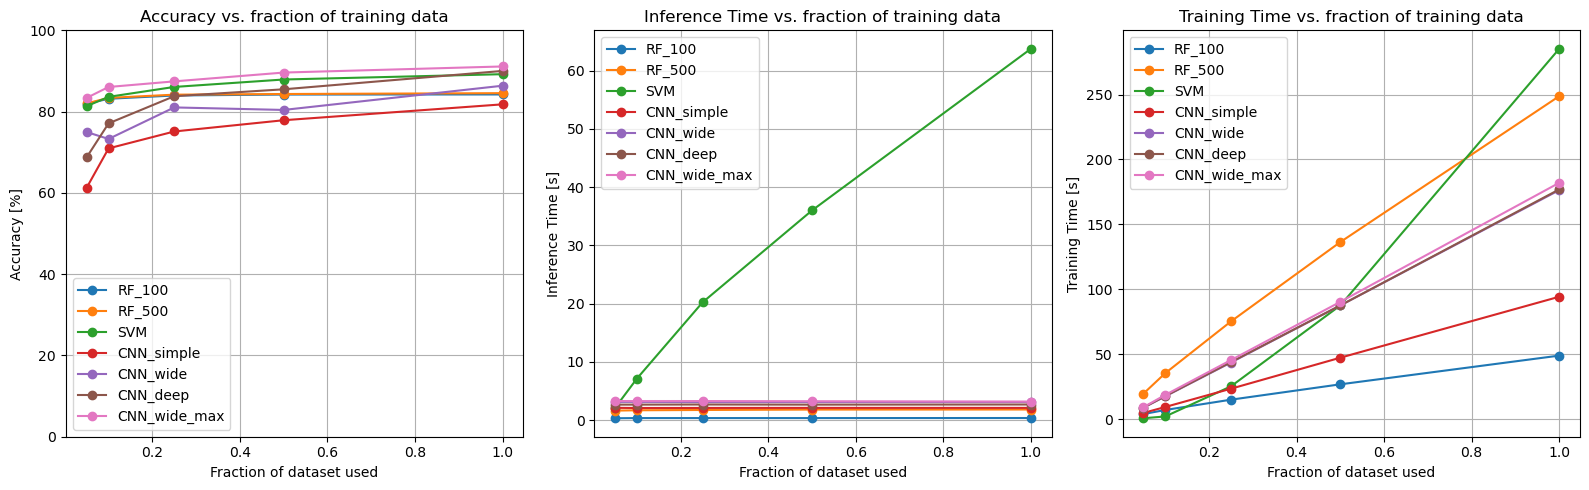

In [72]:
# Nothing to do here, just run the cell.
plot_experiments(experiments, models)

<h3 style="color:rgb(210,90,80)">Question 2.2 (10 Points):</h3>

Q: Which statements about the plots are correct?

a_) Inference time follows a similar pattern for all but one classifier.<br>
b_) All models exhibit a linear relation between training time and data set size.<br>
c_) CNN_simple has the lowest accuracy for all dataset sizes.<br>
d_) The worst accuracy for a model on any dataset is lower than 40%. <br>
e_) The model with the shortest training time for a dataset fraction of 0.25 is a random forest.  <br>
f_) All classifiers have an accuracy higher than 80% when being trained on the full dataset.<br>
g_) Inference and training times indicate that SVMs might not be as computationally efficient for large data sets as CNN models.<br>
h_) A comparison of the performance of any two or more different algorithms is fair as long as they are compared on the same problem, i.e. the same training and test data.<br>
i_) A comparison of the performance of any two or more different algorithms should take into account the number of trainable model parameters and the training and inference times.<br>
j_) Comparing results for CNN_wide(_max) and CNN_deep, all three are relatively close in accuracy, training and inference time, thus which one is better, really depends on the task at hand and one cannot make a general statement on this matter.

To answer the question, assign `True` or `False` boolean values to variables in the next cell. For example, if you think that **a_)** is correct, define a variable `a_` and set it to `True`, the same applies to **b_)** and the other options. A non-correctly answered question as well as no answer (i.e. answer “None”) yields 0 points for a specific question.<br>

In [73]:
# YOUR CODE HERE
a_ = True
b_ = False
c_ = True
d_ = False
e_ = True
f_ = True
g_ = True
h_ = False
i_ = True
j_ = True


In [74]:
# DO NOT DELETE OR EDIT THIS CELL!
assert a_ is not None, "Store True/False!"
assert a_ in [True, False], "Invalid Answer!"

In [75]:
# DO NOT DELETE OR EDIT THIS CELL!
assert b_ is not None, "Store True/False!"
assert b_ in [True, False], "Invalid Answer!"

In [76]:
# DO NOT DELETE OR EDIT THIS CELL!
assert c_ is not None, "Store True/False!"
assert c_ in [True, False], "Invalid Answer!"

In [77]:
# DO NOT DELETE OR EDIT THIS CELL!
assert d_ is not None, "Store True/False!"
assert d_ in [True, False], "Invalid Answer!"

In [78]:
# DO NOT DELETE OR EDIT THIS CELL!
assert e_ is not None, "Store True/False!"
assert e_ in [True, False], "Invalid Answer!"

In [79]:
# DO NOT DELETE OR EDIT THIS CELL!
assert f_ is not None, "Store True/False!"
assert f_ in [True, False], "Invalid Answer!"

In [80]:
# DO NOT DELETE OR EDIT THIS CELL!
assert g_ is not None, "Store True/False!"
assert g_ in [True, False], "Invalid Answer!"

In [81]:
# DO NOT DELETE OR EDIT THIS CELL!
assert h_ is not None, "Store True/False!"
assert h_ in [True, False], "Invalid Answer!"

In [82]:
# DO NOT DELETE OR EDIT THIS CELL!
assert i_ is not None, "Store True/False!"
assert i_ in [True, False], "Invalid Answer!"

In [83]:
# DO NOT DELETE OR EDIT THIS CELL!
assert j_ is not None, "Store True/False!"
assert j_ in [True, False], "Invalid Answer!"